# Problem Statement

**Data Analysis case study**

I am working on a logistic problem where they have faced cancellation of orders in their deliveries. 
Their main goal is to be the 1st prefered delivery partner in Africa.

Main objective is partnership, bringing together both drivers and businesses for the 24hr delivery services.

**Challenge 1**
1. Analyse order cancellations
2. visualize most important aspects using your prefered method.
3. document steps 
4. Insights on how to reduce number of cancelled orders.

**Challenge 2**

-There's been deliberate deletion of data
1. Use the data 2, missed data to predict cancellation reasons for all orders with missing data.
2. Document steps and method used.

**Challenge 3**

create a presentation for the relevant work done.

# Import Packages

In [52]:
##for faster data processing
import numba as nb
import dask as da

#for data manipulation 
import pandas as pd
import numpy as np

##for data visualizations and distributions of the variables
import matplotlib as mtb
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import scipy as sc
import sklearn as skl
import seaborn as sns

%matplotlib inline

# Import datasets

In [32]:
query_df = pd.read_csv('../Sendy_data/analysis_df.csv', sep=',')
test_df = pd.read_csv('../Sendy_data/test_df.csv', sep=',')


# EDA

In [33]:
# to view all the columns during EDA
pd.set_option('display.max_columns', 35)

In [34]:
query_df.head()

,personal_or_business,business_number,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,confirmation_day,confirmation_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled
0,Personal,-1.0,Bike,Express,android,No driver has been allocated to my request.,Customer,1,17:55:38,1,NaN,1,17:56:35,9,-1.313053,36.841437,OnDemAND
1,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,12:26:27,1,12:27:36,1,12:28:44,14,-1.318959,36.853394,OnDemAND
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1,13:21:18,1,13:21:34,1,13:47:29,16,-1.313854,36.706867,OnDemAND
3,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,10:29:19,1,NaN,1,10:29:29,20,-1.206197,36.778776,OnDemAND
4,Personal,-1.0,Bike,Standard,ios,No Partner,Staff,1,14:34:05,1,14:59:08,1,15:49:41,11,-1.296958,36.808166,OnDemAND


In [35]:
query_df.describe()

,business_number,placement_day,confirmation_day,cancellation_day,distance_(km),pickup_lat,pickup_long
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000
mean,13810.055060,3.674018,3.674018,3.674018,13.930862,-1.287768,36.814969
std,16276.500407,1.713099,1.713099,1.713099,45.310560,0.067094,0.113884
min,-1.000000,1.000000,1.000000,1.000000,0.000000,-2.390920,32.628902
25%,-1.000000,2.000000,2.000000,2.000000,5.000000,-1.315811,36.786055
50%,-1.000000,4.000000,4.000000,4.000000,9.000000,-1.291188,36.813105
75%,28396.000000,5.000000,5.000000,5.000000,16.000000,-1.263937,36.843238
max,62392.000000,7.000000,7.000000,7.000000,2061.000000,0.551064,40.689788


In [36]:
query_df.shape

(6393, 17)

In [37]:
query_df.columns

Index(['personal_or_business', 'business_number', 'vehicle_type',
       'standard_or_express', 'platform', 'cancel_reason', 'cancelled_by',
       'placement_day', 'placement_time', 'confirmation_day',
       'confirmation_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled'],
      dtype='object')

In [38]:
query_df.dtypes

personal_or_business     object
business_number         float64
vehicle_type             object
standard_or_express      object
platform                 object
cancel_reason            object
cancelled_by             object
placement_day             int64
placement_time           object
confirmation_day          int64
confirmation_time        object
cancellation_day          int64
cancellation_time        object
distance_(km)             int64
pickup_lat              float64
pickup_long             float64
scheduled                object
dtype: object

In [46]:
query_df=query_df.reset_index()

## Analyse the order cancellations

<Figure size 720x432 with 0 Axes>

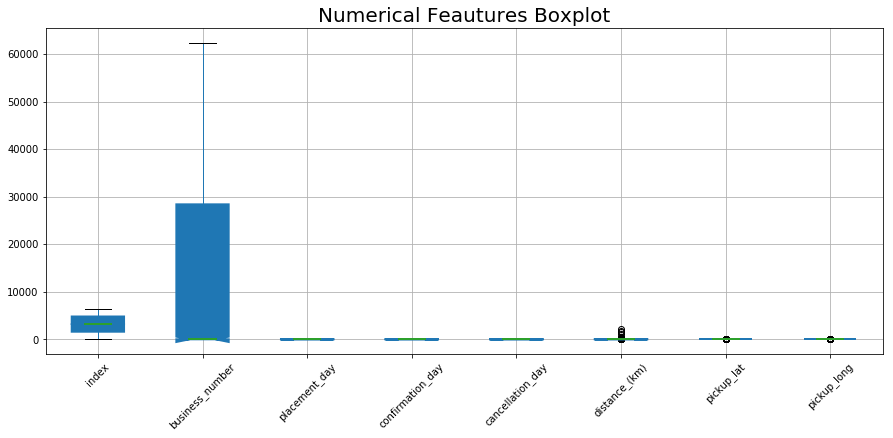

In [49]:
fig=plt.figure(figsize=(10,6))
fig=plt.figure(figsize=(15,6))
query_df.boxplot(return_type='axes',
                 patch_artist=True, notch=True,
                    medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .75)
                );
plt.title('Numerical Feautures Boxplot', fontsize=20)
plt.xticks(rotation = 45);

In [50]:
query_df.corr()

,index,business_number,placement_day,confirmation_day,cancellation_day,distance_(km),pickup_lat,pickup_long
index,1.000000,-0.016740,0.943072,0.943072,0.943072,0.042830,-0.036331,0.056895
business_number,-0.016740,1.000000,-0.024353,-0.024353,-0.024353,-0.041149,-0.066078,0.045934
placement_day,0.943072,-0.024353,1.000000,1.000000,1.000000,0.047666,-0.040651,0.048434
confirmation_day,0.943072,-0.024353,1.000000,1.000000,1.000000,0.047666,-0.040651,0.048434
cancellation_day,0.943072,-0.024353,1.000000,1.000000,1.000000,0.047666,-0.040651,0.048434
distance_(km),0.042830,-0.041149,0.047666,0.047666,0.047666,1.000000,0.032725,-0.014479
pickup_lat,-0.036331,-0.066078,-0.040651,-0.040651,-0.040651,0.032725,1.000000,-0.626917
pickup_long,0.056895,0.045934,0.048434,0.048434,0.048434,-0.014479,-0.626917,1.000000


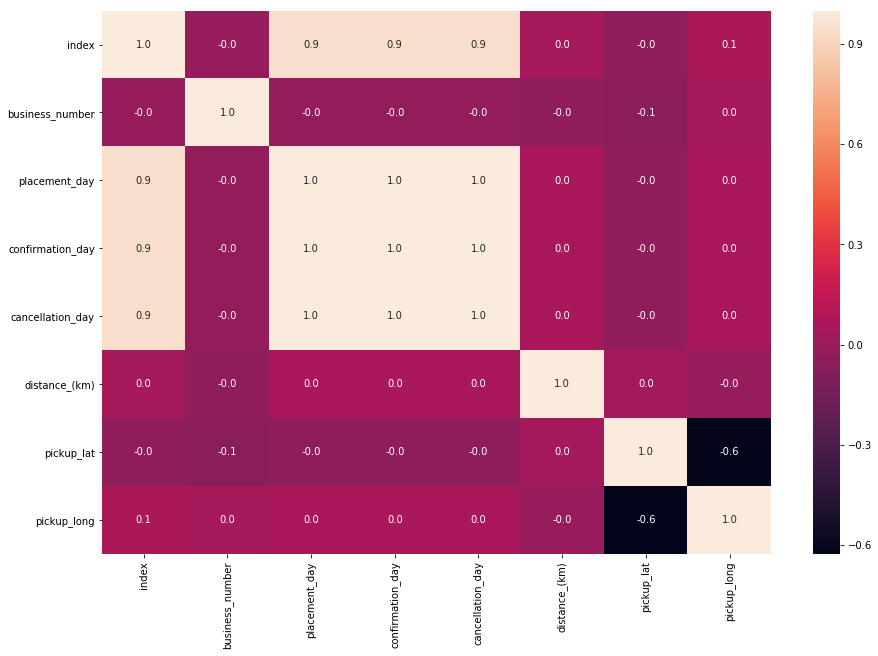

In [53]:
# Plot correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(query_df.corr(), annot=True, fmt=".1f")
plt.show()